# Предсказание температуры стали

# Цель работы

Необходимо построить, и выбрать лучшую, исходя из требования MAE не ниже 8, модель предсказания температуры стали. Для обучения модели будут использованы предобработанные данныье из семи выгрузок, содержащих измерения о протекании процессов во время плавления стали. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение" data-toc-modified-id="Изучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение</a></span><ul class="toc-item"><li><span><a href="#Данные-об-электродах-(data_arc)" data-toc-modified-id="Данные-об-электродах-(data_arc)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Данные об электродах (data_arc)</a></span></li><li><span><a href="#Данные-о-подаче-сыпучих-материалов-(объём)-(data_bulk)" data-toc-modified-id="Данные-о-подаче-сыпучих-материалов-(объём)-(data_bulk)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Данные о подаче сыпучих материалов (объём) (data_bulk)</a></span></li><li><span><a href="#Данные-о-продувке-сплава-газом-(data_gas)" data-toc-modified-id="Данные-о-продувке-сплава-газом-(data_gas)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Данные о продувке сплава газом (data_gas)</a></span></li><li><span><a href="#Результаты-измерения-температуры-(data_temp)" data-toc-modified-id="Результаты-измерения-температуры-(data_temp)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Результаты измерения температуры (data_temp)</a></span></li><li><span><a href="#Данные-о-проволочных-материалах-(объём)-(data_wire)" data-toc-modified-id="Данные-о-проволочных-материалах-(объём)-(data_wire)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Данные о проволочных материалах (объём) (data_wire)</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Выводы-и-наблюдения-по-этапу-предварительного-исследовательского-анализа" data-toc-modified-id="Выводы-и-наблюдения-по-этапу-предварительного-исследовательского-анализа-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Выводы и наблюдения по этапу предварительного исследовательского анализа</a></span></li><li><span><a href="#Вопросы-по-бизнес-процессу-по-итогам-изучения-данных" data-toc-modified-id="Вопросы-по-бизнес-процессу-по-итогам-изучения-данных-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Вопросы по бизнес-процессу по итогам изучения данных</a></span></li><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>План проекта</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Рбота-с-выбросами" data-toc-modified-id="Рбота-с-выбросами-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Рбота с выбросами</a></span></li><li><span><a href="#Выделение-признаков-и-таргета" data-toc-modified-id="Выделение-признаков-и-таргета-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выделение признаков и таргета</a></span></li><li><span><a href="#Соединение-таблиц" data-toc-modified-id="Соединение-таблиц-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Соединение таблиц</a></span></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделение-данных-на-обучающую-и-тестовую-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделение данных на обучающую и тестовую выборки</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Вспомогательные-функции" data-toc-modified-id="Вспомогательные-функции-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вспомогательные функции</a></span></li><li><span><a href="#RandomForrest-RandomSearch-+-лучшие-признаки-KBest" data-toc-modified-id="RandomForrest-RandomSearch-+-лучшие-признаки-KBest-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>RandomForrest RandomSearch + лучшие признаки KBest</a></span></li><li><span><a href="#RandomForrest-RandomSearch-+-последовательный-перебор-мощностей-и-работ,-рассчитанных-разными-способами" data-toc-modified-id="RandomForrest-RandomSearch-+-последовательный-перебор-мощностей-и-работ,-рассчитанных-разными-способами-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>RandomForrest RandomSearch + последовательный перебор мощностей и работ, рассчитанных разными способами</a></span></li><li><span><a href="#RandomForrest-RandomSearch-+-попарный-перебор-мощностей-и-работ,-рассчитанных-разными-способами" data-toc-modified-id="RandomForrest-RandomSearch-+-попарный-перебор-мощностей-и-работ,-рассчитанных-разными-способами-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>RandomForrest RandomSearch + попарный перебор мощностей и работ, рассчитанных разными способами</a></span></li><li><span><a href="#Lasso-RandomSearch-+-kbest" data-toc-modified-id="Lasso-RandomSearch-+-kbest-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Lasso RandomSearch + kbest</a></span></li><li><span><a href="#CatBoost-RandomSearch-+-попарный-перебор-kbest" data-toc-modified-id="CatBoost-RandomSearch-+-попарный-перебор-kbest-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>CatBoost RandomSearch + попарный перебор kbest</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Нейросеть" data-toc-modified-id="Нейросеть-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Нейросеть</a></span></li><li><span><a href="#Какие-пункты-плана-были-выполнены,-а-какие-—-нет.-Почему?" data-toc-modified-id="Какие-пункты-плана-были-выполнены,-а-какие-—-нет.-Почему?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Какие пункты плана были выполнены, а какие — нет. Почему?</a></span></li><li><span><a href="#Какие-трудности-возникли-и-как-вы-их-преодолели?" data-toc-modified-id="Какие-трудности-возникли-и-как-вы-их-преодолели?-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Какие трудности возникли и как вы их преодолели?</a></span></li><li><span><a href="#Какие-ключевые-шаги-в-решении-задачи-вы-выделили?" data-toc-modified-id="Какие-ключевые-шаги-в-решении-задачи-вы-выделили?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Какие ключевые шаги в решении задачи вы выделили?</a></span></li><li><span><a href="#Какие-признаки-использовали-для-обучения-модели-и-какая-предобработка-этих-признаков-была-выполнена?" data-toc-modified-id="Какие-признаки-использовали-для-обучения-модели-и-какая-предобработка-этих-признаков-была-выполнена?-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?</a></span></li><li><span><a href="#Какая-ваша-итоговая-модель,-какие-у-неё-гиперпараметы-и-какое-качество?" data-toc-modified-id="Какая-ваша-итоговая-модель,-какие-у-неё-гиперпараметы-и-какое-качество?-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?</a></span></li><li><span><a href="#В-рамках-работы-были-реализованы-следующие-шаги-и-получены-нижеописанные-результаты:" data-toc-modified-id="В-рамках-работы-были-реализованы-следующие-шаги-и-получены-нижеописанные-результаты:-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>В рамках работы были реализованы следующие шаги и получены нижеописанные результаты:</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

## Загрузка данных

In [3]:
import time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from catboost import Pool
from catboost import cv

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.dummy import DummyRegressor

from tempfile import mkdtemp  
from shutil import rmtree  

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
try:
    data_arc = pd.read_csv('data_arc.csv')
    data_bulk = pd.read_csv('data_bulk.csv')
    data_bulk_time = pd.read_csv('data_bulk_time.csv')
    data_gas = pd.read_csv('data_gas.csv')
    data_temp = pd.read_csv('data_temp.csv')
    data_wire = pd.read_csv('data_wire.csv')
    data_wire_time = pd.read_csv('data_wire_time.csv')
    
except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

## Изучение

In [5]:
for data in [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]:
    display(data.columns)

Index(['key', 'Начало нагрева дугой', 'Конец нагрева дугой',
       'Активная мощность', 'Реактивная мощность'],
      dtype='object')

Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15'],
      dtype='object')

Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15'],
      dtype='object')

Index(['key', 'Газ 1'], dtype='object')

Index(['key', 'Время замера', 'Температура'], dtype='object')

Index(['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

Index(['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

Данные о времени загрузки масс и проволоки нам не нужны в рамках данной задачи - их рассматривать не будем. Остальные признаки переименуем:

In [6]:
data_arc.columns = ['key','arc_start', 'arc_finish', 'active_power', 'reactive_power']
data_bulk.columns = ['key','bulk_vol_1', 'bulk_vol_2', 'bulk_vol_3', 'bulk_vol_4', 'bulk_vol_5', \
                     'bulk_vol_6', 'bulk_vol_7','bulk_vol_8','bulk_vol_9', 'bulk_vol_10','bulk_vol_11', \
                     'bulk_vol_12','bulk_vol_13','bulk_vol_14','bulk_vol_15']
data_gas.columns = ['key', 'gas']
data_temp.columns = ['key', 'mesure_time', 'tempreture']
data_wire.columns = ['key','wire_vol_1', 'wire_vol_2', 'wire_vol_3', 'wire_vol_4', 'wire_vol_5', \
                     'wire_vol_6', 'wire_vol_7','wire_vol_8','wire_vol_9']

### Данные об электродах (data_arc)

In [7]:
data_arc.columns

Index(['key', 'arc_start', 'arc_finish', 'active_power', 'reactive_power'], dtype='object')

In [8]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             14876 non-null  int64  
 1   arc_start       14876 non-null  object 
 2   arc_finish      14876 non-null  object 
 3   active_power    14876 non-null  float64
 4   reactive_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Нет пропусков в данных, типы данных определены корректно

In [9]:
data_arc.describe()

key  active_power  reactive_power
count  14876.000000  14876.000000    14876.000000
mean    1615.220422      0.670441        0.452592
std      934.571502      0.408159        5.878702
min        1.000000      0.030002     -715.504924
25%      806.000000      0.395297        0.290991
50%     1617.000000      0.555517        0.415962
75%     2429.000000      0.857034        0.637371
max     3241.000000      3.731596        2.676388

In [10]:
data_arc.head()

key            arc_start           arc_finish  active_power  reactive_power
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02      0.976059        0.687084
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33      0.805607        0.520285
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36      0.744363        0.498805
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19      1.659363        1.062669
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37      0.692755        0.414397

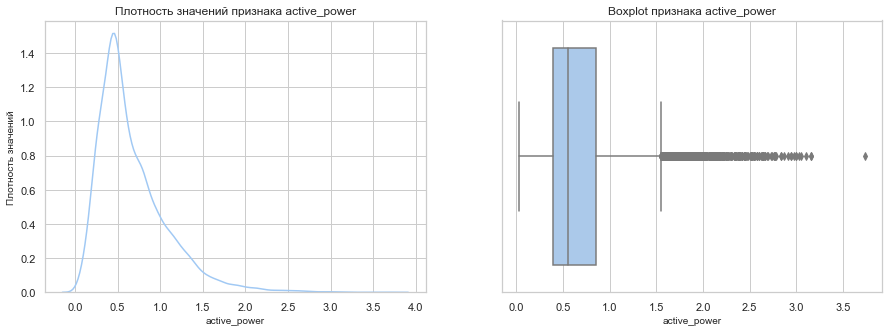

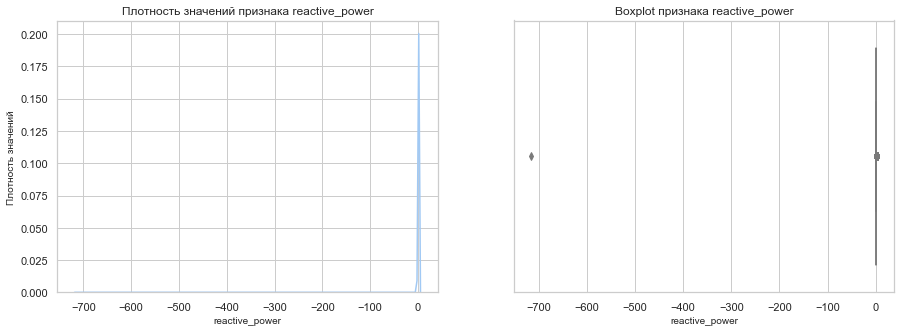

In [11]:
sns.set_theme(style='whitegrid', palette="pastel6")

for column in data_arc.select_dtypes(include='number').columns.drop('key'):

    fig, ax = plt.subplots(1,2, figsize = (15,5))
    kde = sns.kdeplot(data=data_arc[column], ax=ax[0])
    box = sns.boxplot(x=data_arc[column], ax=ax[1])
    
    kde.set_title(f'Плотность значений признака {column}')
    box.set_title(f'Boxplot признака {column}')
    kde.set_xlabel(f'{column}', fontsize = 10)
    kde.set_ylabel('Плотность значений', fontsize = 10)
    box.set_xlabel(f'{column}', fontsize = 10)

    plt.show()
  

Значение ключа 'key' распределено равномерно что характено для ключа, связывающего таблицы. Активная мощность расрпределена околонормально. В значениях реактивной мощности есть выброс в сторону отрицательных значений. Стоит рассмотреть картину без него. 

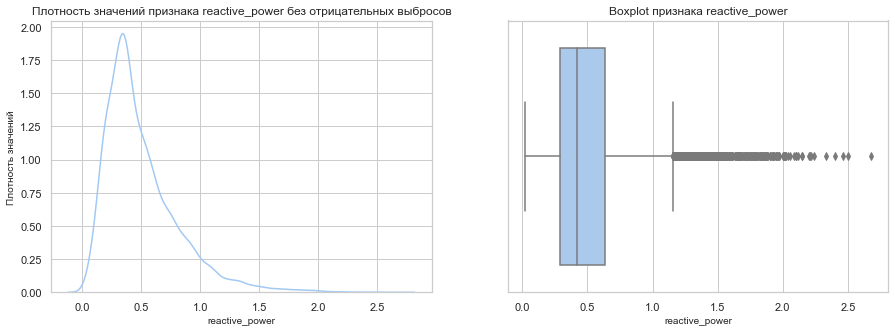

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
kde = sns.kdeplot(data=data_arc.query('reactive_power > 0')['reactive_power'], ax=ax[0])
box = sns.boxplot(x=data_arc.query('reactive_power > 0')['reactive_power'], ax=ax[1])

kde.set_title(f'Плотность значений признака reactive_power без отрицательных выбросов')
box.set_title(f'Boxplot признака reactive_power')
kde.set_xlabel(f'reactive_power', fontsize = 10)
kde.set_ylabel('Плотность значений', fontsize = 10)
box.set_xlabel(f'reactive_power', fontsize = 10)

plt.show()

После удаления выброса видим околонормальное распределение реактивной мощности скошенное влево равно как и распределение активной мощности

In [13]:
data_arc.query('reactive_power > 0').corr()

key  active_power  reactive_power
key             1.000000     -0.021367       -0.000159
active_power   -0.021367      1.000000        0.963182
reactive_power -0.000159      0.963182        1.000000

Сильная корреляция активной и реактивной мощности. 

### Данные о подаче сыпучих материалов (объём) (data_bulk)

In [14]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          3129 non-null   int64  
 1   bulk_vol_1   252 non-null    float64
 2   bulk_vol_2   22 non-null     float64
 3   bulk_vol_3   1298 non-null   float64
 4   bulk_vol_4   1014 non-null   float64
 5   bulk_vol_5   77 non-null     float64
 6   bulk_vol_6   576 non-null    float64
 7   bulk_vol_7   25 non-null     float64
 8   bulk_vol_8   1 non-null      float64
 9   bulk_vol_9   19 non-null     float64
 10  bulk_vol_10  176 non-null    float64
 11  bulk_vol_11  177 non-null    float64
 12  bulk_vol_12  2450 non-null   float64
 13  bulk_vol_13  18 non-null     float64
 14  bulk_vol_14  2806 non-null   float64
 15  bulk_vol_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [15]:
data_bulk.describe()

key  bulk_vol_1  bulk_vol_2   bulk_vol_3   bulk_vol_4  \
count  3129.000000  252.000000   22.000000  1298.000000  1014.000000   
mean   1624.383509   39.242063  253.045455   113.879045   104.394477   
std     933.337642   18.277654   21.180578    75.483494    48.184126   
min       1.000000   10.000000  228.000000     6.000000    12.000000   
25%     816.000000   27.000000  242.000000    58.000000    72.000000   
50%    1622.000000   31.000000  251.500000    97.500000   102.000000   
75%    2431.000000   46.000000  257.750000   152.000000   133.000000   
max    3241.000000  185.000000  325.000000   454.000000   281.000000   

       bulk_vol_5  bulk_vol_6  bulk_vol_7  bulk_vol_8  bulk_vol_9  \
count   77.000000  576.000000   25.000000         1.0   19.000000   
mean   107.025974  118.925347  305.600000        49.0   76.315789   
std     81.790646   72.057776  191.022904         NaN   21.720581   
min     11.000000   17.000000   47.000000        49.0   63.000000   
25%     70.000000   69.750000  155.000000        49.0   66.000000   
50%     86.000000  100.000000  298.000000        49.0   68.000000   
75%    132.000000  157.000000  406.000000        49.0   70.500000   
max    603.000000  503.000000  772.000000        49.0  147.000000   

       bulk_vol_10  bulk_vol_11  bulk_vol_12  bulk_vol_13  bulk_vol_14  \
count   176.000000   177.000000  2450.000000    18.000000  2806.000000   
mean     83.284091    76.819209   260.471020   181.111111   170.284747   
std      26.060347    59.655365   120.649269    46.088009    65.868652   
min      24.000000     8.000000    53.000000   151.000000    16.000000   
25%      64.000000    25.000000   204.000000   153.250000   119.000000   
50%      86.500000    64.000000   208.000000   155.500000   151.000000   
75%     102.000000   106.000000   316.000000   203.500000   205.750000   
max     159.000000   313.000000  1849.000000   305.000000   636.000000   

       bulk_vol_15  
count  2248.000000  
mean    160.513345  
std      51.765319  
min       1.000000  
25%     105.000000  
50%     160.000000  
75%     205.000000  
max     405.000000

In [16]:
data_bulk.isna().sum().sum()

35776

Пропущено более 70% значений

In [17]:
data_bulk.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

Наиболее информативные данные с массами 14, 12 и 15. Вероятно, пропуски связаны с тем, что в ряде операций, те или иные массы(1-15) не участвовали. Для корректной работы моделей наиболее верно будет заполнить пропуски нулевыми значениями - нет объема, значит ноль. 

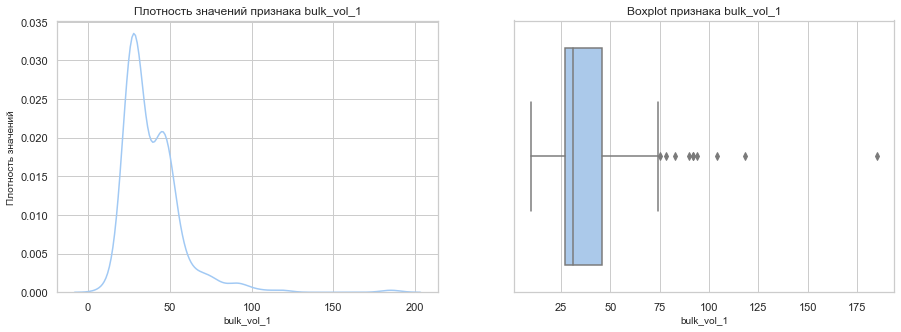

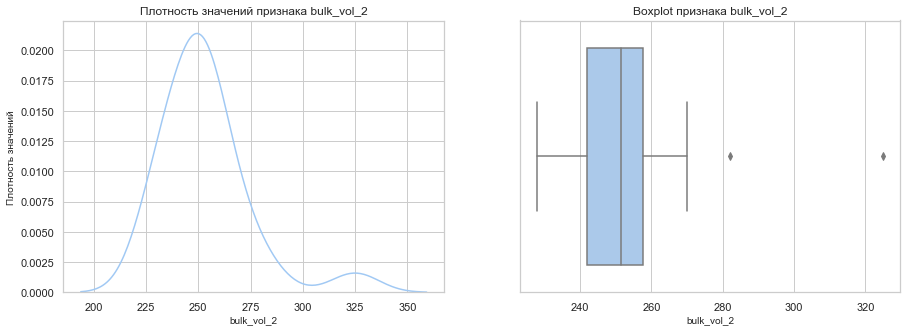

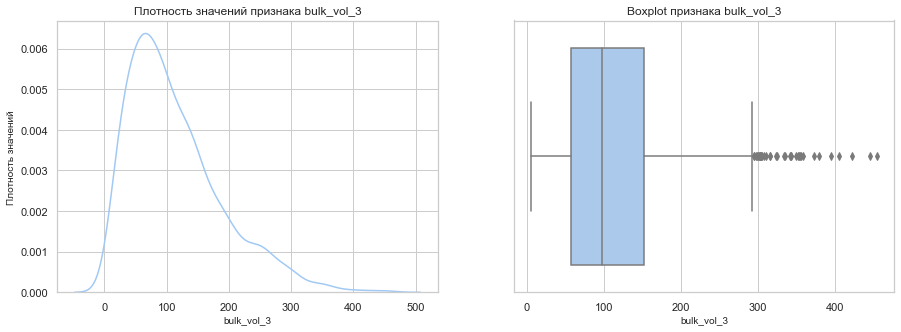

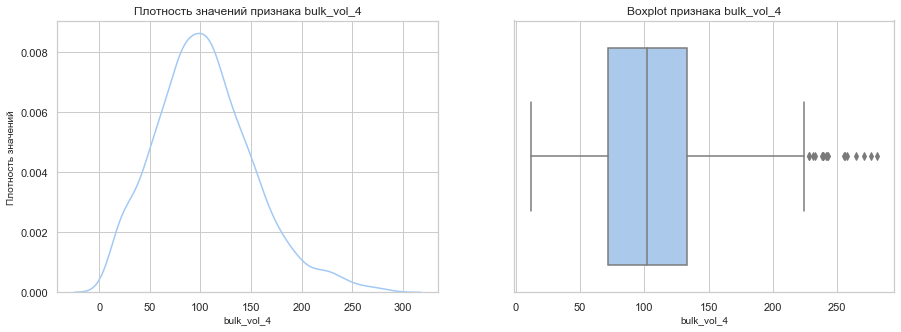

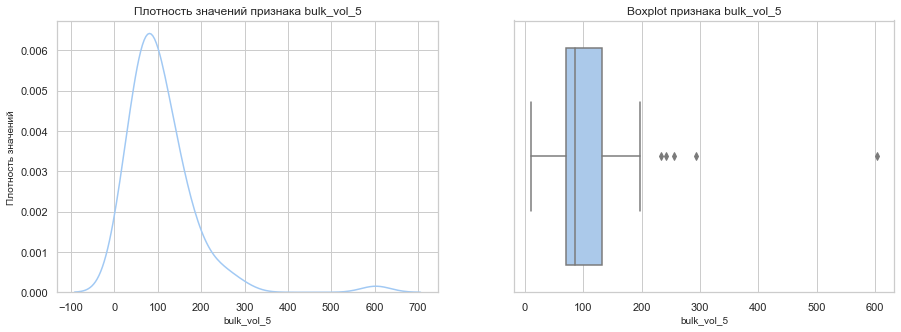

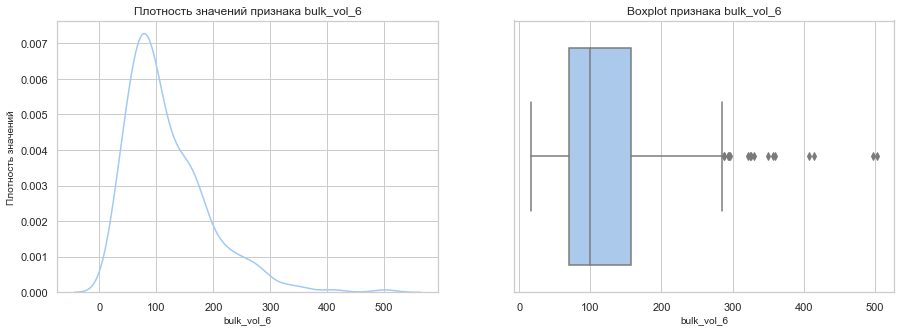

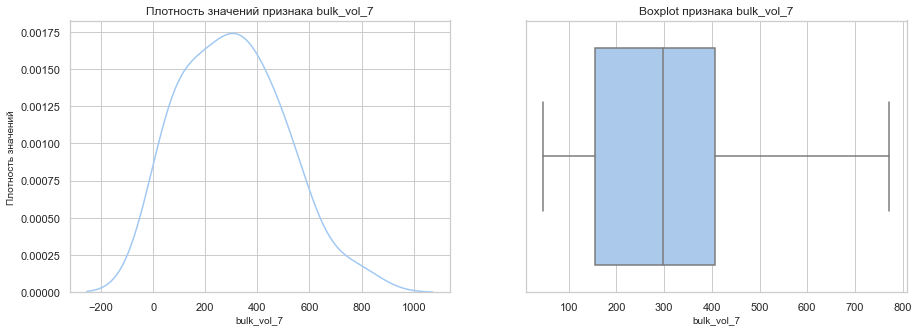

C:\Users\klyuchevenko.e\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


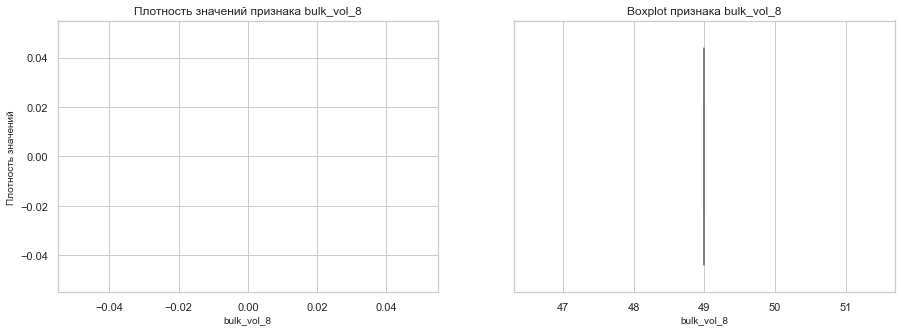

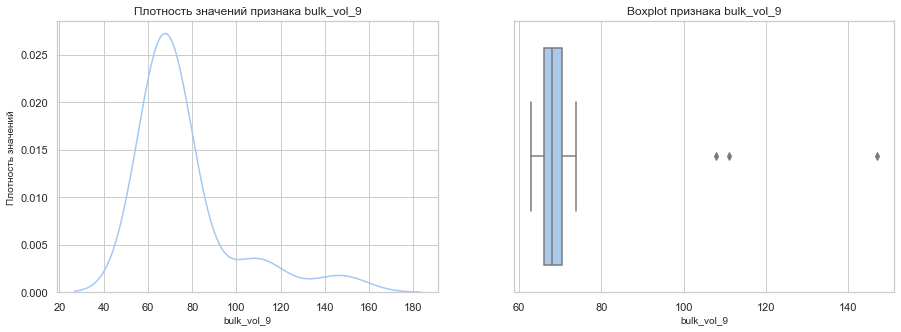

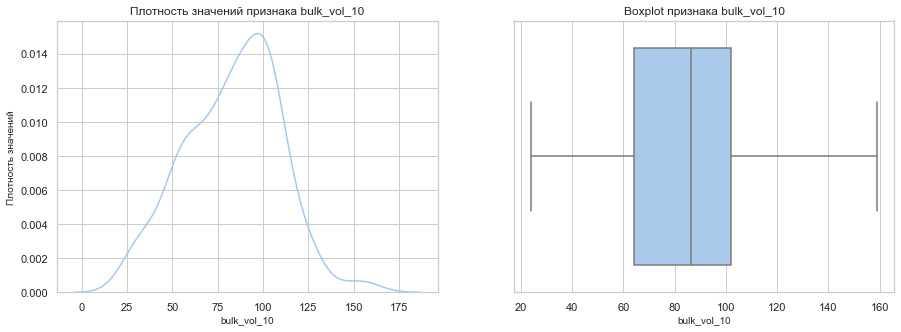

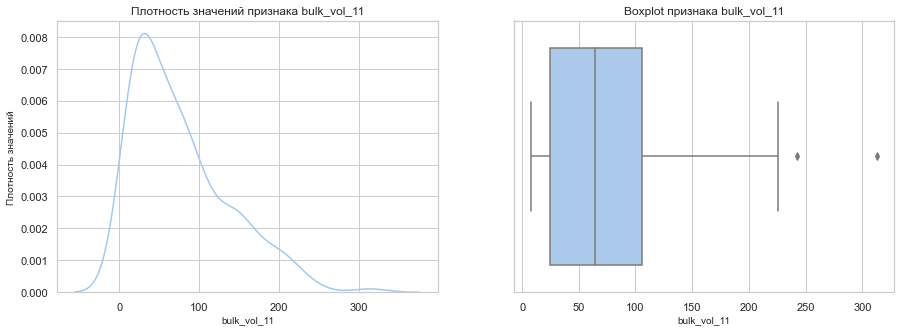

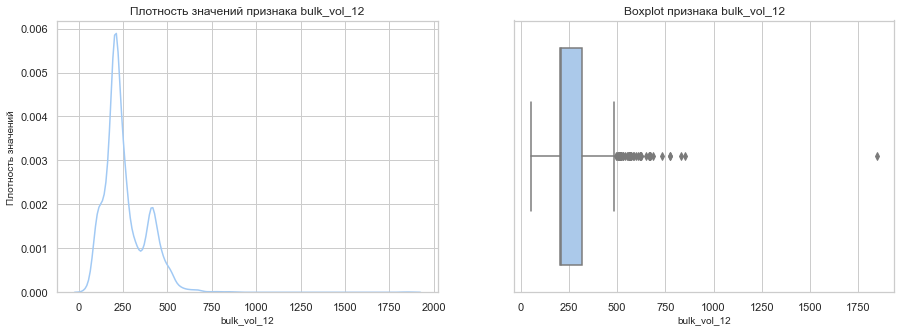

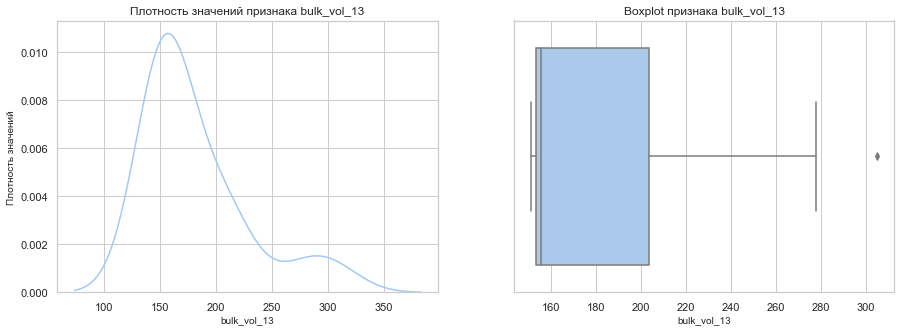

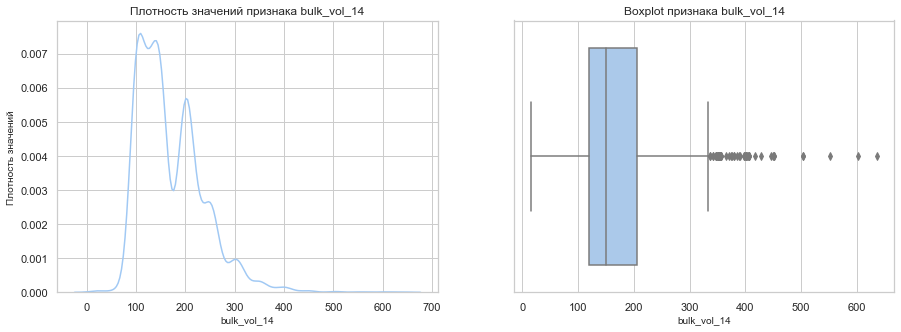

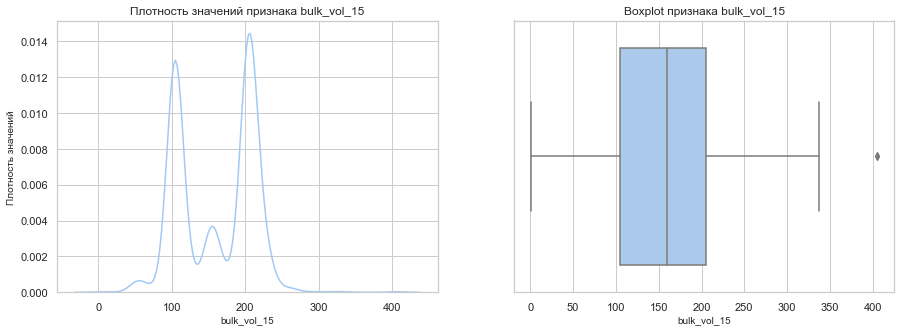

In [18]:
for column in data_bulk.select_dtypes(include='number').columns.drop('key'):

    fig, ax = plt.subplots(1,2, figsize = (15,5))
    kde = sns.kdeplot(data=data_bulk[column], ax=ax[0])
    box = sns.boxplot(x=data_bulk[column], ax=ax[1])
    
    kde.set_title(f'Плотность значений признака {column}')
    box.set_title(f'Boxplot признака {column}')
    kde.set_xlabel(f'{column}', fontsize = 10)
    kde.set_ylabel('Плотность значений', fontsize = 10)
    box.set_xlabel(f'{column}', fontsize = 10)

    plt.show()

Наиболее явные значения, претендующие на выбросы в виде отдельно стоящих пиков наблюдаются в массах 5,7,8,9,13. Характерно, что все эти массы имеют большой процент пропусков. При этом, стандартное отклонение, минимум и максимум по всем значениям соизмеримы и, соответственно, имеют одинаковую размерность. Вероятность, что это действительно выбросы низкая - будем работать с данными как есть. 

### Данные о продувке сплава газом (data_gas) 


In [19]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [20]:
data_gas.describe()

key          gas
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040

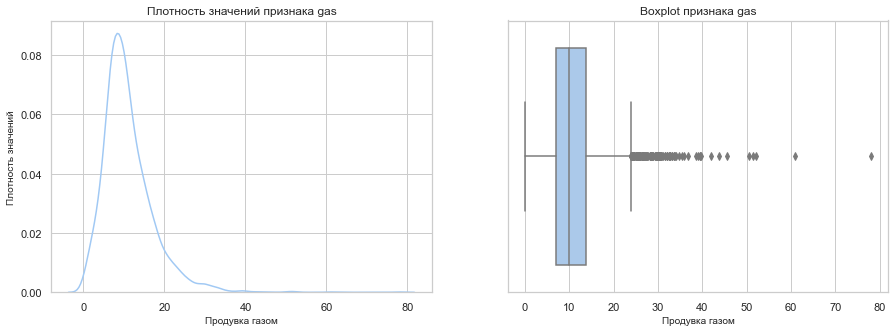

In [21]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.set_theme(style='whitegrid', palette="pastel6")

kde = sns.kdeplot(data=data_gas['gas'], ax=ax[0])
box = sns.boxplot(x=data_gas['gas'], ax=ax[1])
kde.set_title('Плотность значений признака gas')
box.set_title('Boxplot признака gas')
kde.set_xlabel('Продувка газом', fontsize = 10)
kde.set_ylabel('Плотность значений', fontsize = 10)
box.set_xlabel('Продувка газом', fontsize = 10)

plt.show()

Пропусков в данных нет. Распределение околономальное, датасет вместе со средним скошен влево. Есть потенциальные аномалии - требуется больше информации о процессе для их обработки.

### Результаты измерения температуры (data_temp)  


In [22]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          15907 non-null  int64  
 1   mesure_time  15907 non-null  object 
 2   tempreture   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [23]:
data_temp.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

Есть пропуски в значениях температуры - всего 18%. Заполнять пропуски не стоит так как это целевое значение. Удалим строки полностью, содержащие эти пропуски.

### Данные о проволочных материалах (объём) (data_wire)  


In [24]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         3081 non-null   int64  
 1   wire_vol_1  3055 non-null   float64
 2   wire_vol_2  1079 non-null   float64
 3   wire_vol_3  63 non-null     float64
 4   wire_vol_4  14 non-null     float64
 5   wire_vol_5  1 non-null      float64
 6   wire_vol_6  73 non-null     float64
 7   wire_vol_7  11 non-null     float64
 8   wire_vol_8  19 non-null     float64
 9   wire_vol_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [25]:
data_wire.describe()

key   wire_vol_1   wire_vol_2  wire_vol_3  wire_vol_4  \
count  3081.000000  3055.000000  1079.000000   63.000000   14.000000   
mean   1623.426485   100.895853    50.577323  189.482681   57.442842   
std     932.996726    42.012518    39.320216   99.513444   28.824667   
min       1.000000     1.918800     0.030160    0.144144   24.148801   
25%     823.000000    72.115684    20.193680   95.135044   40.807002   
50%    1619.000000   100.158234    40.142956  235.194977   45.234282   
75%    2434.000000   126.060483    70.227558  276.252014   76.124619   
max    3241.000000   330.314424   282.780152  385.008668  113.231044   

       wire_vol_5  wire_vol_6  wire_vol_7  wire_vol_8  wire_vol_9  
count       1.000   73.000000   11.000000   19.000000   29.000000  
mean       15.132   48.016974   10.039007   53.625193   34.155752  
std           NaN   33.919845    8.610584   16.881728   19.931616  
min        15.132    0.034320    0.234208   45.076721    4.622800  
25%        15.132   25.053600    6.762756   46.094879   22.058401  
50%        15.132   42.076324    9.017009   46.279999   30.066399  
75%        15.132   64.212723   11.886057   48.089603   43.862003  
max        15.132  180.454575   32.847674  102.762401   90.053604

In [26]:
data_wire.isna().sum().sum()

23385

Пропущено более 75% значений

In [27]:
data_wire.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

Наиболее информативные данные с массами 1 и 2. Вероятно, пропуски связаны с тем, что в ряде операций, те или иные массы(1-5) не участвовали. Для корректной работы моделей наиболее верно будет заполнить пропуски нулевыми значениями - нет объема, значит ноль. 

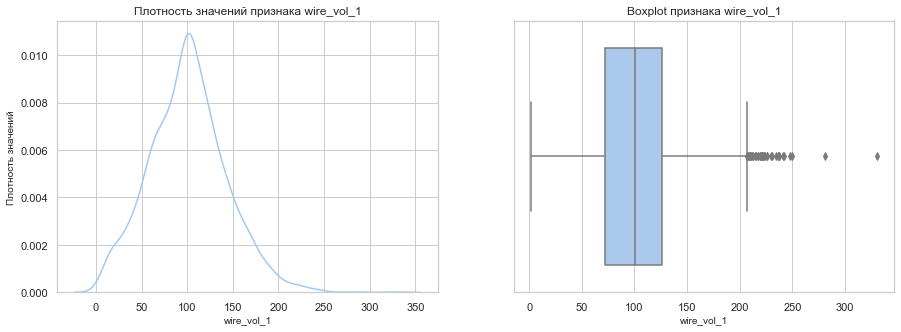

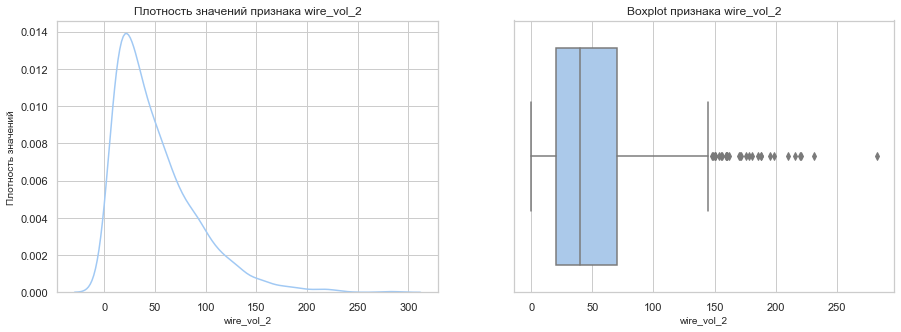

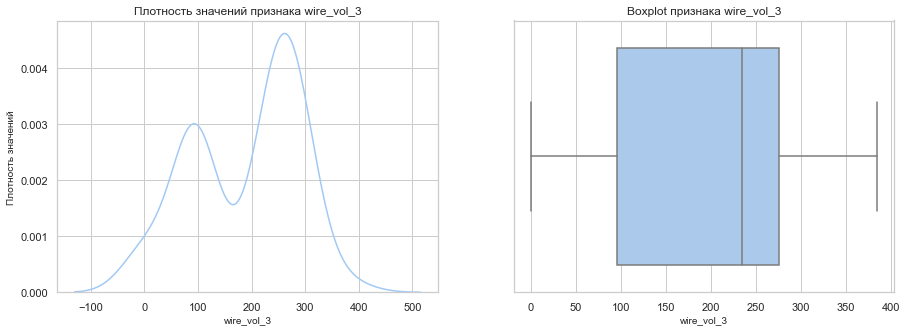

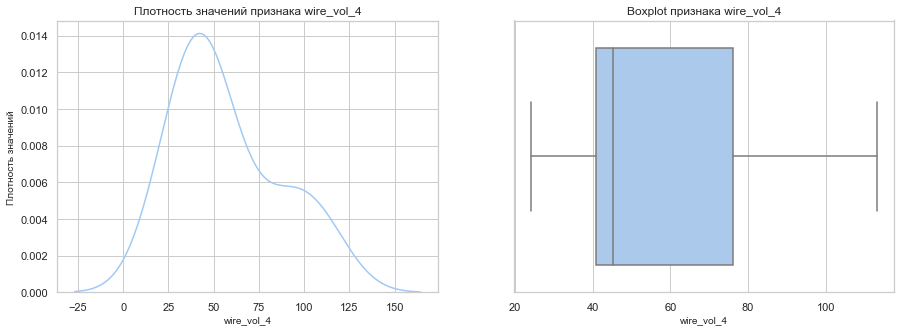

C:\Users\klyuchevenko.e\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


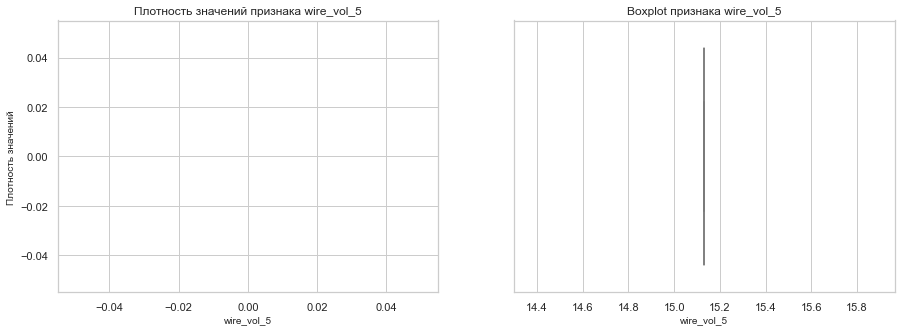

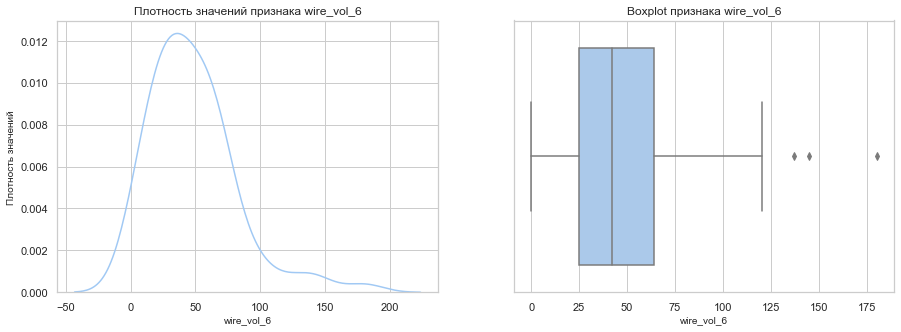

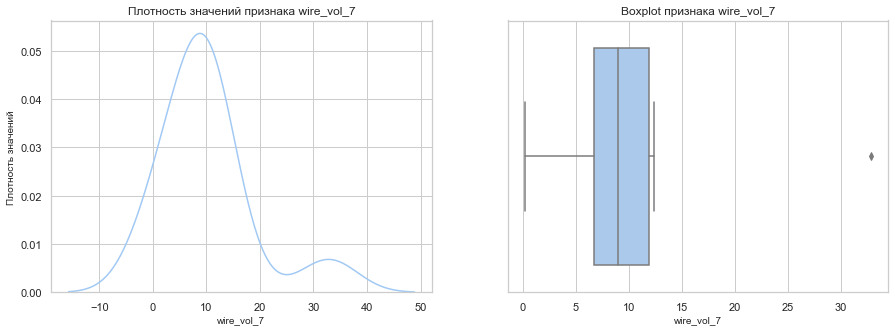

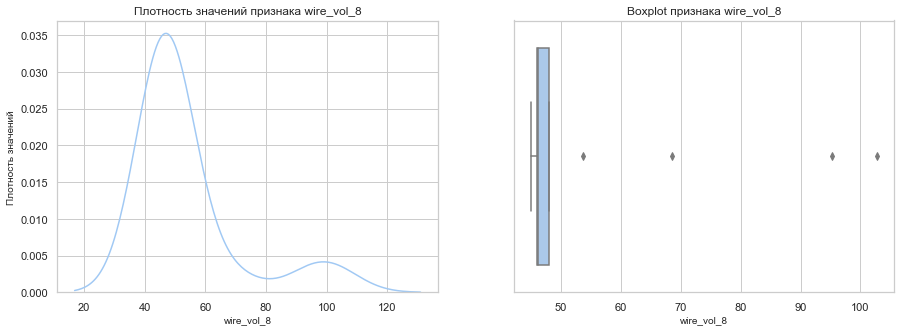

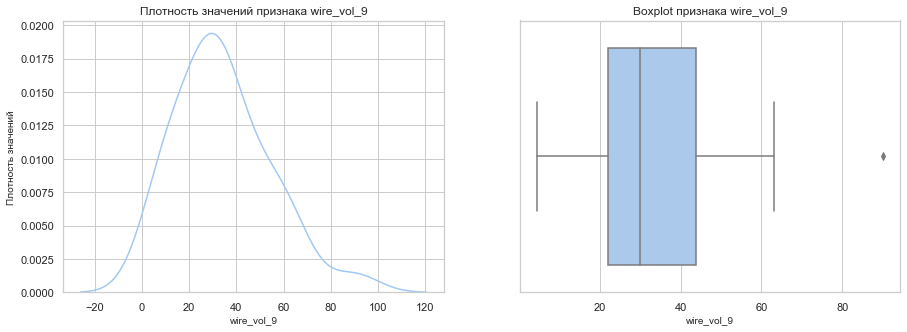

In [28]:
for column in data_wire.select_dtypes(include='number').columns.drop('key'):

    fig, ax = plt.subplots(1,2, figsize = (15,5))
    kde = sns.kdeplot(data=data_wire[column], ax=ax[0])
    box = sns.boxplot(x=data_wire[column], ax=ax[1])
    
    kde.set_title(f'Плотность значений признака {column}')
    box.set_title(f'Boxplot признака {column}')
    kde.set_xlabel(f'{column}', fontsize = 10)
    kde.set_ylabel('Плотность значений', fontsize = 10)
    box.set_xlabel(f'{column}', fontsize = 10)

    plt.show()

Наиболее явные значения, претендующие на выбросы в виде отдельно стоящих пиков наблюдаются в массах с 3 по 5. Характерно, что все эти массы имеют большой процент пропусков. При этом, стандартное отклонение, минимум и максимум по всем значениям соизмеримы и, соответственно, имеют одинаковую размерность. Вероятность, что это действительно выбросы низкая - будем работать с данными как есть. ДЛя более информативных масс - 1 и 2, распределение нормальное и логонормальное соответственно

### Проверка на дубликаты 

In [118]:
for data in [data_arc, data_bulk, data_gas, data_temp, data_wire]:
    print(data.duplicated().sum())

0
0
0
786
0


### Выводы и наблюдения по этапу предварительного исследовательского анализа 

<br> 1. Названия признаков(столбцов) прведены к общему виду: переименованы по-английски в нижнем регистре, соответственно:
<br> 1.1. Для датафрейма 'data_arc.csv' с данными об электродах: 
<br> 'Начало нагрева дугой' - 'arc_start' 
<br> 'Конец нагрева дугой' - 'arc_finish'
<br> 'Активная мощность' - 'active_power'
<br> 'Реактивная мощность' - 'reactive_power'
<br> 1.2. Для датафрейма 'data_bulk.csv' c данными о подаче сыпучих материалов (объём):
<br> 'Bulk 1':'Bulk 15' - 'bulk_vol_1':'bulk_vol_15'
<br> 1.3. Для датафрейма 'data_gas.csv' c даннsvb о продувке сплава газом:
<br> 'Газ 1' - 'gas'
<br> 1.4. Для датафрейма 'data_temp.csv' c результатами измерения температуры:
<br> 'Время замера' - 'mesure_time' 
<br> 'Температура' - 'tempreture'
<br> 1.5. Для датафрейма `data_wire.csv` с данными о проволочных материалах (объём):
<br> 'Wire 1':'Wire 9' - 'wire_vol_1':'wire_vol_9'

2. Все многочисленные пропуски в данных с объемом загрузки сыпучих и провлочных материалов будем заполнять нулевыми значениями
3. Есть явный выброс в измерениях реактивной мощности в сторону отрицательных значений - его стоит исключить
4. Потенциальные выбросы в данных о загрузке проволоки и сыпучх материалов могут не оказаться выбросами - оставим их в том же виде, чтобы не испортить след реального технологического процесса. 
5. Данные обо всех временных характеристиках загрузки материалов в формат datetime переводить ни к чему - мы их не будем использовать в модели
6. Объем и качество дланных позволяют построить модель
7. В роли ключа для связки таблиц будем использовать признак 'key'
8. Сильная корреляция активной и реактивной мощности. Это стоит учесть при моделировании и уточнении значимых признаков 

### Вопросы по бизнес-процессу по итогам изучения данных


1. Какие метрики необходимо оценить при построении модели, как они вычисляются(если это собственные разработанные метрики) и какие требования к ним предъвляются?
2. Как прогноз температуры должен повлиять на энергосбережение? 
3. Каковы допустимые значения активной и реактивной мощностей для нагрузки, рассматриваемой в рамках данного проекта?
4. Данные о реактивной мощности собираются автоматизированно с датчиков или вручную? Возможны ли ошибки в размерностях(кВт, МВт, итд). 
5. Реактивная мощность - фактически можно интерпретировать мощность потерь, верно?. Является ли ее значение существенным для нашей задачи или важна только активная мощность?
6. Какие значения объемов закружаемого вещества (bulk и wire) считаются приемлемыми/допустимыми для процесса? 
7. Что представляют сосбой данные в датафрейме data_gas? В чем измеряются?
8. Какие значения продувки газом считаются приемлемыми/допустимыми для процесса? 
9. Является ли процесс изменения температурного режима плавным или могут быть точечные(изолированные) повышения температуры? ('data_temp.csv' )
10. Как будет использоваться модель в продуктивной среде? (приложение, сервис, итд)
11. В каком виде будут поступать данные для модели в продуктивной среде? Можем ли считать предоставленный объем данных реальным или была проведена предварительная обработка?  
12. Какие из представленных в данных признаков предположительно влияют на температуру, а какие могут быть излишьними с точки зрения технологии процесса? 
13. Как продувка газом связана со временем? 

### План проекта
**1. Проведение обзора данных (EDA)**

**Подготовка данных:** 
* Импорт необходимых библиотек;
* Чтение файлов и сохранение полученных данных в переменные;
* Получение общей информации о таблицах (head, info, describe);
* Корректировка наименований столбцов (при необходимости).
* Выводы

**Анализ данных:**
* Графическое представление данных из таблиц;
* Проверка данных на аномалии.
* Выводы

**Предобработка данных:**
* Корректировка типов данных (при необходимости);
* Заполнение пропусков / удаление дубликатов (при наличии);
* Выделение признаков и таргета;
* Соединение таблиц.
* Выводы

**Исследование итоговой таблицы с данными:**
* Аналитический анализ
* графический анализ
* корреляционный анализ
* выводы

**2. Построение модели машинного обучения**

**Обучение модели:**
* Разделение данных на обучающую и тестовую выборки;
* Масштабирование данных;
* Обучение модели линейной регрессии;
* Обучение модели градиентного бустинга с перебором гиперпараметров;
* Константная модели.
* Выбор лучшей модели

**Проверка моделей:**
* Тестирование лучшей модели на тестовой выборке;
* Если MAE на тестовых данных > 6.8 - доработка модели.
* Анализ важности факторов

**3. Общий вывод**

## Предобработка данных


### Изменение типов данных


Изменим только тип данных для столбца со значением времени измерения в данных data_temp на datetime, чтобы можно было в дальнейшем выбрать последние измерения для каждого ключа

In [29]:
data_temp['mesure_time'] = pd.to_datetime(data_temp['mesure_time'], format='%Y-%m-%d %H:%M:%S')

In [30]:
data_arc['arc_start'] = pd.to_datetime(data_arc['arc_start'], format='%Y-%m-%d %H:%M:%S')
data_arc['arc_finish'] = pd.to_datetime(data_arc['arc_finish'], format='%Y-%m-%d %H:%M:%S')

### Обработка пропущенных значений


In [31]:
data_bulk = data_bulk.fillna(0)

In [32]:
data_wire = data_wire.fillna(0)

In [33]:
data_temp = data_temp.dropna()

In [34]:
data_temp

key         mesure_time  tempreture
0         1 2019-05-03 11:16:18      1571.0
1         1 2019-05-03 11:25:53      1604.0
2         1 2019-05-03 11:29:11      1618.0
3         1 2019-05-03 11:30:01      1601.0
4         1 2019-05-03 11:30:39      1613.0
5         2 2019-05-03 11:37:27      1581.0
6         2 2019-05-03 11:38:00      1577.0
7         2 2019-05-03 11:49:38      1589.0
8         2 2019-05-03 11:55:50      1604.0
9         2 2019-05-03 11:58:24      1608.0
10        2 2019-05-03 11:59:12      1602.0
11        3 2019-05-03 12:13:17      1596.0
12        3 2019-05-03 12:18:36      1597.0
13        3 2019-05-03 12:25:06      1598.0
14        3 2019-05-03 12:30:48      1599.0
15        3 2019-05-03 12:34:57      1599.0
16        4 2019-05-03 12:52:57      1601.0
17        4 2019-05-03 12:58:43      1623.0
18        4 2019-05-03 12:59:25      1625.0
19        5 2019-05-03 13:23:19      1576.0
20        5 2019-05-03 13:36:01      1602.0
21        6 2019-05-03 13:49:24      1543.0
22        6 2019-05-03 14:04:31      1581.0
23        6 2019-05-03 14:11:11      1600.0
24        6 2019-05-03 14:11:50      1600.0
25        6 2019-05-03 14:12:29      1596.0
26        7 2019-05-03 14:19:43      1586.0
27        7 2019-05-03 14:20:19      1582.0
28        7 2019-05-03 14:32:07      1599.0
29        7 2019-05-03 14:38:48      1595.0
30        7 2019-05-03 14:42:37      1599.0
31        8 2019-05-03 15:07:18      1577.0
32        8 2019-05-03 15:17:09      1604.0
33        8 2019-05-03 15:20:42      1600.0
34        8 2019-05-03 15:22:52      1598.0
35        9 2019-05-03 15:37:03      1587.0
36        9 2019-05-03 15:45:37      1589.0
37        9 2019-05-03 15:51:15      1597.0
38        9 2019-05-03 15:58:39      1589.0
39        9 2019-05-03 16:01:16      1592.0
40       10 2019-05-03 16:14:29      1574.0
41       10 2019-05-03 16:21:26      1580.0
42       10 2019-05-03 16:28:18      1585.0
43       10 2019-05-03 16:29:05      1586.0
44       10 2019-05-03 16:32:37      1586.0
45       10 2019-05-03 16:33:05      1586.0
46       10 2019-05-03 16:35:26      1588.0
47       10 2019-05-03 16:36:08      1593.0
48       11 2019-05-03 16:54:18      1616.0
49       11 2019-05-03 16:57:03      1608.0
50       11 2019-05-03 17:20:27      1583.0
51       11 2019-05-03 17:27:23      1597.0
52       12 2019-05-03 17:40:54      1606.0
53       12 2019-05-03 17:52:25      1606.0
54       12 2019-05-03 18:03:34      1585.0
55       12 2019-05-03 18:09:10      1588.0
56       12 2019-05-03 18:09:40      1584.0
57       12 2019-05-03 18:12:30      1595.0
58       12 2019-05-03 18:13:03      1591.0
59       13 2019-05-03 18:38:59      1596.0
60       13 2019-05-03 18:53:08      1602.0
61       13 2019-05-03 18:57:31      1610.0
62       13 2019-05-03 19:03:09      1613.0
63       13 2019-05-03 19:03:39      1621.0
64       13 2019-05-03 19:04:18      1615.0
65       13 2019-05-03 19:06:15      1619.0
66       14 2019-05-03 20:00:42      1583.0
67       14 2019-05-03 20:15:49      1581.0
68       14 2019-05-03 20:24:33      1602.0
69       14 2019-05-03 20:31:54      1596.0
70       14 2019-05-03 20:34:10      1600.0
71       14 2019-05-03 20:38:22      1606.0
72       15 2019-05-03 20:58:40      1605.0
73       15 2019-05-03 20:59:18      1607.0
74       15 2019-05-03 21:16:15      1611.0
75       15 2019-05-03 21:23:23      1613.0
76       15 2019-05-03 21:23:54      1599.0
77       15 2019-05-03 21:33:01      1598.0
78       16 2019-05-03 22:03:47      1581.0
79       16 2019-05-03 22:19:18      1590.0
80       16 2019-05-03 22:30:45      1609.0
81       16 2019-05-03 22:31:25      1607.0
82       17 2019-05-03 22:42:34      1611.0
83       17 2019-05-03 22:51:16      1611.0
84       17 2019-05-03 22:51:45      1596.0
85       17 2019-05-03 22:58:34      1591.0
86       17 2019-05-03 23:06:31      1599.0
87       17 2019-05-03 23:10:16      1599.0
88       18 2019-05-03 23:22:18      1588.0
89       18 2019-05-03 23:36:18      1600.0
90  

Осталось удалить измерения, при которых есть данные только о температуре, а признаки либо нулевые, либо пропущены. Сделаем это после объединения таблиц

### Рбота с выбросами

In [35]:
len(data_temp[data_temp['tempreture'] < 1400])

7

In [36]:
data_temp = data_temp[data_temp['tempreture'] >= 1400]

In [37]:
data_arc = data_arc[data_arc['reactive_power'] > 0]

### Выделение признаков и таргета


В качестве taget используем значение температуры, причем только измерение в последней итерации


В качестве признаков нам понадобятся:
* из таблицы data_arc: active_power,  reactive_power. Причем, так как высока степень корреляции этих признаков, попробуем их объединить различными способами: полная мощность, косинус фи и дополнительно попрбуем обхединить эти признаки методом главных компонент (PCA) 3 новых признака
* Рассчитаем работу для каждой мощности от старта до финала нагрева +3 признака
* добавим признак начальной температуры нагрева + 1 признак 

* из таблицы data_bulk: bulk_vol_1 - bulk_vol_15 всего 15 признаков
* из таблицы data_gas только 'gas' всего 1 признак
* из таблицы data_wire: wire_vol_1 - wire_vol_9 всего 9 признаков <br><br> 
итого у нас 32 исходных признака. 6ть из них (мощности и работы) будем пробовать перебирать

### Соединение таблиц

Объединять будем по значению ключа в признаке 'key', а перед обучением удалим его из общей таблицы. Но сначала сделаем объединение признаков мощности в нескольких вариантах

In [38]:
pca = PCA(n_components=1)
data_arc['pca_power'] = pca.fit_transform(data_arc.drop(columns=['key', 'arc_start', 'arc_finish'])).T[0]

In [39]:
data_arc.head(4)

key           arc_start          arc_finish  active_power  reactive_power  \
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.976059        0.687084   
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.805607        0.520285   
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.744363        0.498805   
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19      1.659363        1.062669   

   pca_power  
0   0.356213  
1   0.119694  
2   0.057861  
3   1.127928

In [40]:
data_arc['full_power'] = np.sqrt(data_arc['active_power']**2 + data_arc['reactive_power']**2)

In [41]:
data_arc['power_factor'] = data_arc['active_power'] / data_arc['full_power']

In [42]:
data_arc = data_arc.drop(columns=['active_power', 'reactive_power'])

In [43]:
data_arc.head(4)

key           arc_start          arc_finish  pca_power  full_power  \
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02   0.356213    1.193639   
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33   0.119694    0.959010   
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36   0.057861    0.896038   
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19   1.127928    1.970470   

   power_factor  
0      0.817717  
1      0.840041  
2      0.830728  
3      0.842115

Для расчета работы расчитаем временные промежутки в которых происходили изменения

In [44]:
data_delta = data_arc.pivot_table(
    index='key', values=['arc_start', 'arc_finish'], aggfunc=['first', 'last']
)
data_delta.columns = ['f_f', 'f_s', 'l_f', 'l_s']
data_delta = data_delta.drop(columns=['f_f', 'l_s'])

seconds = []
for i in data_delta['l_f'] - data_delta['f_s']:
    seconds.append(i.total_seconds())

Для расчета работы выделим начальные и конечные значения трех мощностей

In [45]:
data_arbeit = data_arc
data_arbeit = data_arbeit.pivot_table(
    index='key', values=['pca_power', 'full_power', 'power_factor'], aggfunc=['sum']
)

In [46]:
data_arbeit.columns = ['full_power_sum', 'pca_power_sum', 'power_factor_sum']

Добавив в датасет время изменения

In [47]:
data_arbeit['time_delta'] = seconds

Работа будет равна разнице финальной и начальной мощностей, умноженной на время

In [48]:
data_arbeit['a_full_power'] = data_arbeit['full_power_sum'] * data_arbeit['time_delta']
data_arbeit['a_pca_power'] = data_arbeit['pca_power_sum'] * data_arbeit['time_delta']
data_arbeit['a_power_factor'] = data_arbeit['power_factor_sum'] * data_arbeit['time_delta']

In [49]:
data_arbeit = data_arbeit.drop(
    columns=['time_delta', 'full_power_sum', 'pca_power_sum', 'power_factor_sum']
)

In [50]:
data_arbeit.head()

a_full_power  a_pca_power  a_power_factor
key                                           
1     9223.183180  2576.386466     6630.836687
2     4174.703555   335.405345     3844.564605
3     4559.039597 -1836.715084     6446.333705
4     4169.753876   498.087979     3679.833302
5     5496.702157   928.381948     4511.512893

Выделим мощности последнего измерения

In [51]:
data_arc = data_arc.set_index('arc_start')
data_arc = data_arc.pivot_table(
    index='key', values=['pca_power', 'full_power', 'power_factor'], aggfunc=['last']
)


In [52]:
data_arc.columns = ['pca_power', 'full_power', 'power_factor']

Обхединим мощности и работы в одну таблицу

In [53]:
power_df = pd.merge(
    data_arc,
    data_arbeit,
    how='inner',
    on='key'
)

In [54]:
power_df.head()

pca_power  full_power  power_factor  a_full_power  a_pca_power  \
key                                                                   
1     0.807239   -0.034163      0.858178   9223.183180  2576.386466   
2     0.975867    0.135316      0.848213   4174.703555   335.405345   
3     0.294865   -0.543090      0.848795   4559.039597 -1836.715084   
4     1.435385    0.592476      0.850611   4169.753876   498.087979   
5     0.323503   -0.513668      0.826752   5496.702157   928.381948   

     a_power_factor  
key                  
1       6630.836687  
2       3844.564605  
3       6446.333705  
4       3679.833302  
5       4511.512893

In [55]:
power_df.shape

(3214, 6)

Для таргета нам понадобятся последние значения температуры из каждой партии, а для дополнительного признака, наоборот, начальные. Но прежде очистим выборку от единичных наблюдений:

In [56]:
iter_count = data_temp.pivot_table(
    index='key', values=['tempreture'], aggfunc=['count']
)
valid_index = iter_count[iter_count['count']['tempreture'] > 1].index

data_temp = data_temp[data_temp['key'].isin(valid_index)]

In [57]:
data_temp = data_temp.set_index('mesure_time')
data_temp = data_temp.pivot_table(
    index='key', values=['tempreture'], aggfunc=['first', 'last']
)


In [58]:
data_temp.columns = ['start_tempreture', 'finish_tempreture']

Теперь все объединим

In [59]:
df = pd.merge(
    power_df,
    data_temp,
    how='inner',
    on='key'
)

df = pd.merge(
    df,
    data_bulk,
    how='inner',
    on='key'
)

df = pd.merge(
    df,
    data_gas,
    how='inner',
    on='key'
)

df = pd.merge(
    df,
    data_wire,
    how='inner',
    on='key'
)


In [60]:
df.head()

key  pca_power  full_power  power_factor  a_full_power  a_pca_power  \
0    1   0.807239   -0.034163      0.858178   9223.183180  2576.386466   
1    2   0.975867    0.135316      0.848213   4174.703555   335.405345   
2    3   0.294865   -0.543090      0.848795   4559.039597 -1836.715084   
3    4   1.435385    0.592476      0.850611   4169.753876   498.087979   
4    5   0.323503   -0.513668      0.826752   5496.702157   928.381948   

   a_power_factor  start_tempreture  finish_tempreture  bulk_vol_1  \
0     6630.836687            1571.0             1613.0         0.0   
1     3844.564605            1581.0             1602.0         0.0   
2     6446.333705            1596.0             1599.0         0.0   
3     3679.833302            1601.0             1625.0         0.0   
4     4511.512893            1576.0             1602.0         0.0   

   bulk_vol_2  bulk_vol_3  bulk_vol_4  bulk_vol_5  bulk_vol_6  bulk_vol_7  \
0         0.0         0.0        43.0         0.0         0.0         0.0   
1         0.0         0.0        73.0         0.0         0.0         0.0   
2         0.0         0.0        34.0         0.0         0.0         0.0   
3         0.0         0.0        81.0         0.0         0.0         0.0   
4         0.0         0.0        78.0         0.0         0.0         0.0   

   bulk_vol_8  bulk_vol_9  bulk_vol_10  bulk_vol_11  bulk_vol_12  bulk_vol_13  \
0         0.0         0.0          0.0          0.0        206.0          0.0   
1         0.0         0.0          0.0          0.0        206.0          0.0   
2         0.0         0.0          0.0          0.0        205.0          0.0   
3         0.0         0.0          0.0          0.0        207.0          0.0   
4         0.0         0.0          0.0          0.0        203.0          0.0   

   bulk_vol_14  bulk_vol_15        gas  wire_vol_1  wire_vol_2  wire_vol_3  \
0        150.0        154.0  29.749986   60.059998     0.00000         0.0   
1        149.0        154.0  12.555561   96.052315     0.00000         0.0   
2        152.0        153.0  28.554793   91.160157     0.00000         0.0   
3        153.0        154.0  18.841219   89.063515     0.00000         0.0   
4        151.0        152.0   5.413692   89.238236     9.11456         0.0   

   wire_vol_4  wire_vol_5  wire_vol_6  wire_vol_7  wire_vol_8  wire_vol_9  
0         0.0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0         0.0

In [117]:
df.duplicated().sum()

0

In [61]:
df.shape

(2329, 34)

Все верно 34 столбца минус ключ, минут таргет = 32 признака на месте

### Проверка на мультиколлинеарность 

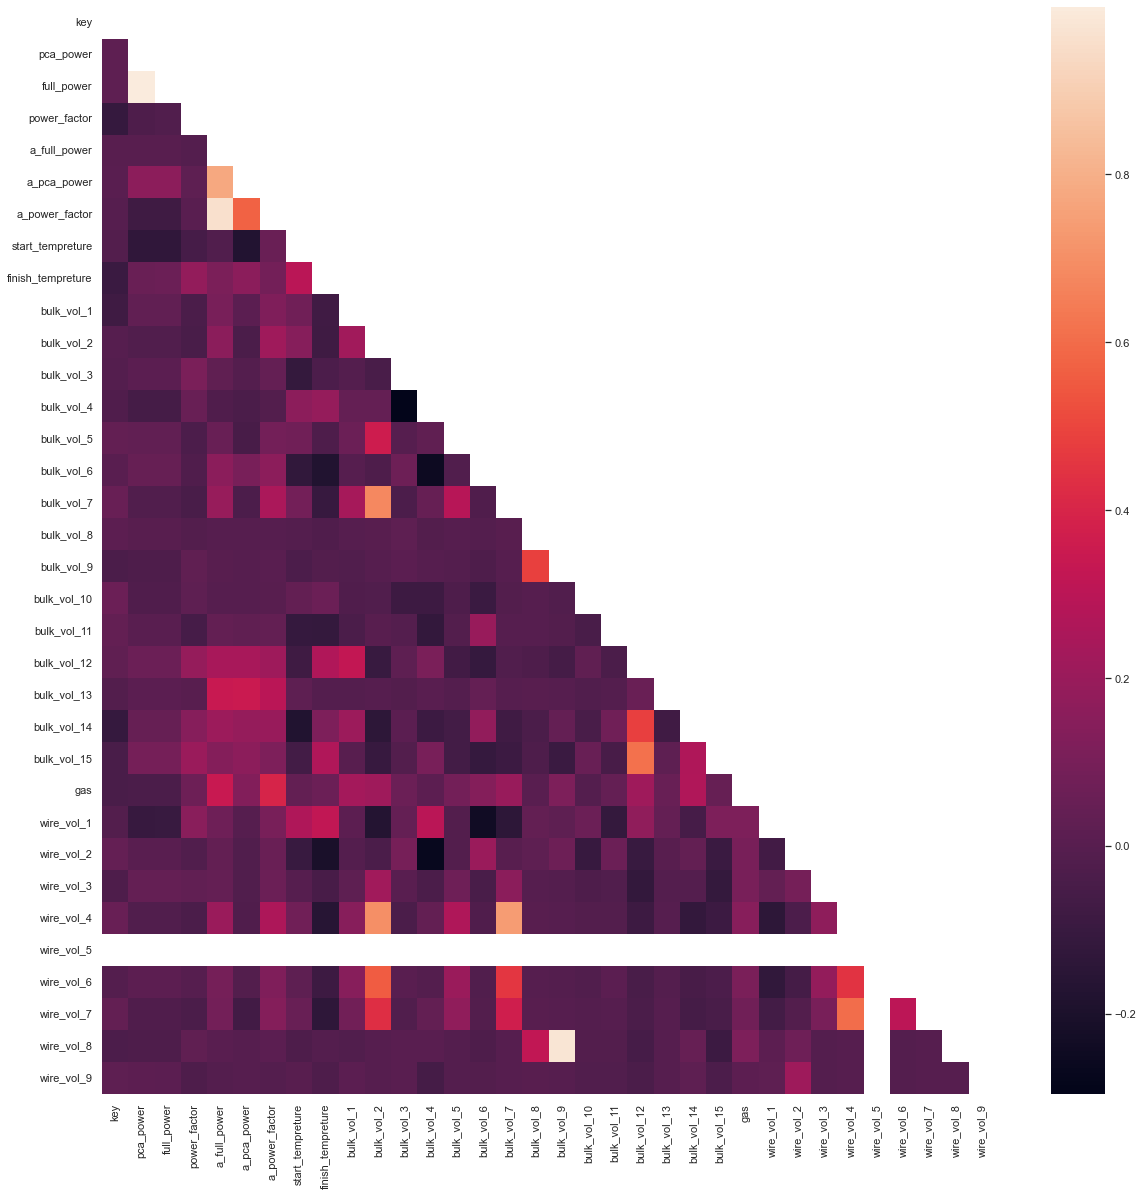

In [62]:
matrix = np.triu(df.corr())

fig, ax = plt.subplots(figsize = (20,20))

sns.heatmap(df.corr(), mask=matrix)
plt.show()

Есть сильные коррекляции и в наших мощностях и в загрузке проволоки. Определим их:

In [63]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
hi_corr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\klyuchevenko.e\AppData\Local\Temp\ipykernel_15220\704511141.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [64]:
hi_corr

['full_power', 'a_pca_power', 'a_power_factor', 'wire_vol_4', 'wire_vol_8']

Что ж, будем прощаться...

In [65]:
df = df.drop(columns=hi_corr)


In [66]:
df.shape

(2329, 29)

# Построение модели машинного обучения


## Обучение модели

### Разделение данных на обучающую и тестовую выборки


In [92]:
target = df['finish_tempreture']
features = df.drop(columns=['finish_tempreture', 'key'])

features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size=0.25, random_state=100423)


### Обучение модели 


#### Вспомогательные функции

Для удобства обучения моделей и перебора гиперметров и входных параметров создадим функцию, которая на вход будет получать сетку гиперпараметров для перебора, пайплайн с шагами и условие в трех вариантах:
* two_factor - перебор парами факторы можности и работы
* one_factor - перебор всех факторов мощности и работы последовательно по одному
* по умоляанию (любые другие значения) - использование полного набора признаков


In [69]:
def modeler(grid, pipe, feature_cut=None):

    random_search = RandomizedSearchCV(
        pipe,
        param_distributions=grid,
        random_state=100423,
        cv=5, n_jobs=-1, verbose=0, 
        scoring='neg_mean_absolute_error'
    )
    score = 0
    best_score = 100
    best_power = None
    best_arbeit = None
    best_hyper = None
    cut_features = features_train.drop(
        columns=[
            'pca_power', 'power_factor', 'a_full_power'
         ]
                  )
    if feature_cut == 'two_factor':
        for arbeit in ['a_full_power']:    
            cut_features['arbeit'] = features_train[arbeit]
            for power in ['pca_power', 'power_factor']:
                cut_features['power'] = features_train[power]
                random_search.fit(cut_features, target_train)
                score = random_search.best_score_
                if abs(score) < abs(best_score):
                    best_score = abs(score)
                    best_power = power
                    best_arbeit = arbeit
                    best_hyper = random_search.best_params_
                    best_search = random_search
        print(f'Лучшее сочетание мощности и работы {best_power} и {best_arbeit} с MAE = {best_score}')           
        print(f'Лучший набор гиперпараметров = {best_hyper}')
        
    elif feature_cut == 'one_factor':
        for arb_pow in ['pca_power', 'power_factor', 'a_full_power']:    
                cut_features['arb_pow'] = features_train[arb_pow]
                random_search.fit(cut_features, target_train)                  
                score = random_search.best_score_
                if abs(score) < abs(best_score):
                    best_score = abs(score)
                    best_arb_pow = arb_pow
                    best_hyper = random_search.best_params_
                    best_search = random_search
        print(f'Лучшая фича {best_arb_pow} с MAE = {best_score}')           
        print(f'Лучший набор гиперпараметров = {best_hyper}') 

    else:                 
        random_search.fit(features_train, target_train)
        print(f'Лучший MAE = {abs(random_search.best_score_)}')
        print(f'Лучший набор гиперпараметров = {random_search.best_params_}')
        best_search = random_search

    return best_search

#### RandomForrest RandomSearch + лучшие признаки KBest

Пробуем случайный лес с перебором гиперпараметров и предварительным поиском лучших признаков, также с перебором

In [70]:
%%time

param_grid = dict(

    k_best__k = range(10,27,1),
    regressor__n_estimators=[int(x) for x in np.linspace(start = 1, stop = 100, num = 30)],
    regressor__max_depth=[None] + [int(x) for x in np.linspace(start = 1, stop = 40, num = 20)],
    regressor__max_features = ['auto', 'sqrt'],
    regressor__min_samples_split = [2, 6, 12, 15],
    regressor__min_samples_leaf = [1, 3, 4, 6]
)

forrest_estimator = modeler(
    grid=param_grid, 
    pipe=Pipeline(
        [
            ("scale", StandardScaler()),
            ("k_best", SelectKBest(f_regression)),
            ("regressor", RandomForestRegressor(random_state=100423))
        ]
    ), feature_cut=False
)

C:\Users\klyuchevenko.e\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Лучший MAE = 6.5738872116954665
Лучший набор гиперпараметров = {'regressor__n_estimators': 100, 'regressor__min_samples_split': 12, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'auto', 'regressor__max_depth': 13, 'k_best__k': 20}
CPU times: total: 1.08 s
Wall time: 8.43 s


In [71]:
selected_features = features_train.columns[
    forrest_estimator.best_estimator_.named_steps['k_best'].get_support()
]
selected_features

Index(['pca_power', 'power_factor', 'a_full_power', 'start_tempreture',
       'bulk_vol_1', 'bulk_vol_2', 'bulk_vol_3', 'bulk_vol_4', 'bulk_vol_6',
       'bulk_vol_7', 'bulk_vol_11', 'bulk_vol_12', 'bulk_vol_14',
       'bulk_vol_15', 'gas', 'wire_vol_1', 'wire_vol_2', 'wire_vol_3',
       'wire_vol_6', 'wire_vol_7'],
      dtype='object')

Получили наиболее информативные фичи по мнению k_best. На них MAE = 6,57. Уже достаточно для проверки на тестовой выборке, но попробуем улучшить результат

#### RandomForrest RandomSearch + последовательный перебор мощностей и работ, рассчитанных разными способами

In [116]:
%%time

param_grid = dict(

    regressor__n_estimators=[int(x) for x in np.linspace(start = 1, stop = 100, num = 30)],
    regressor__max_depth=[None] + [int(x) for x in np.linspace(start = 1, stop = 40, num = 20)],
    regressor__max_features = ['auto', 'sqrt'],
    regressor__min_samples_split = [2, 6, 12, 15],
    regressor__min_samples_leaf = [1, 3, 4, 6]
)

forrest_estimator = modeler(
    grid=param_grid, 
    pipe=Pipeline(
        [
            ("scale", StandardScaler()),
            ("regressor", RandomForestRegressor(random_state=100423))
        ]
    ), feature_cut='one_factor'
)

Лучшая фича a_full_power с MAE = 6.608074046916049
Лучший набор гиперпараметров = {'regressor__n_estimators': 55, 'regressor__min_samples_split': 12, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 'auto', 'regressor__max_depth': 15}
CPU times: total: 1.27 s
Wall time: 5.65 s


Получили результат на 2 сотых хуже (6,6) но, также в рамках нужного значения. Смысла перебирать таким образом, вероятно нет - kbest отработал лучше. А если парами?^:


#### RandomForrest RandomSearch + попарный перебор мощностей и работ, рассчитанных разными способами

In [117]:
%%time

param_grid = dict(

    regressor__n_estimators=[int(x) for x in np.linspace(start = 1, stop = 100, num = 30)],
    regressor__max_depth=[None] + [int(x) for x in np.linspace(start = 1, stop = 40, num = 20)],
    regressor__max_features = ['auto', 'sqrt'],
    regressor__min_samples_split = [2, 6, 12, 15],
    regressor__min_samples_leaf = [1, 3, 4, 6]
)

forrest_estimator = modeler(
    grid=param_grid, 
    pipe=Pipeline(
        [
            ("scale", StandardScaler()),
            ("regressor", RandomForestRegressor(random_state=100423))
        ]
    ), feature_cut='two_factor'
)

Лучшее сочетание мощности и работы power_factor и a_full_power с MAE = 6.571150532998556
Лучший набор гиперпараметров = {'regressor__n_estimators': 86, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 'auto', 'regressor__max_depth': 15}
CPU times: total: 1.56 s
Wall time: 4.66 s


Вернулись к MAE 6,57 - Фактически повторили успехи kbest. Важно также учесть что перебор признаков обычным циклом проходит быстрее - на текущем наборе данных это не заметно, но при росте объемов разница может быть ощутима. При этом качество прогноза также падает из-за того, что kbest использует дополнительные механизмы оптимизации расчета и выбора фич. таким образом имеем классический выбор - медленно и точно или быстро но не точно.

#### Lasso RandomSearch + kbest

In [98]:
%%time

param_grid = dict(
    k_best__k = range(10,27,1),
    line__alpha=[int(x) for x in np.linspace(start = 1, stop = 30, num = 30)],
)

lasso_estimator = modeler(
    grid=param_grid, 
    pipe=Pipeline(
        [
            ("scale", StandardScaler()),
            ("k_best", SelectKBest(f_regression)),
            ("line", Lasso())
        ]
    ), feature_cut='False'
)

Лучший MAE = 7.277087423951376
Лучший набор гиперпараметров = {'line__alpha': 1, 'k_best__k': 25}
CPU times: total: 188 ms
Wall time: 3.44 s


C:\Users\klyuchevenko.e\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Тут нас ничего хорошего не ожидало - MAE = 7,28

Почистим мультиколлинеарные признаки с большей пристальностью для линейной модели:

In [100]:
corr_matrix_linear = df.corr().abs()
upper_linear = corr_matrix_linear.where(np.triu(np.ones(corr_matrix_linear.shape), k=1).astype(np.bool))
hi_corr_linear = [column for column in upper_linear.columns if any(upper_linear[column] > 0.5)]
hi_corr_linear

C:\Users\klyuchevenko.e\AppData\Local\Temp\ipykernel_15220\460304066.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_linear = corr_matrix_linear.where(np.triu(np.ones(corr_matrix_linear.shape), k=1).astype(np.bool))


['bulk_vol_7', 'bulk_vol_15', 'wire_vol_6']

In [101]:
df_linear = df.drop(columns=hi_corr_linear)

In [102]:
target = df_linear['finish_tempreture']
features = df_linear.drop(columns=['finish_tempreture', 'key'])

features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size=0.25, random_state=100423)

и повторим эксперимент:

In [103]:
%%time

param_grid = dict(
    k_best__k = range(10,24,1),
    line__alpha=[int(x) for x in np.linspace(start = 1, stop = 30, num = 30)],
)

lasso_estimator = modeler(
    grid=param_grid, 
    pipe=Pipeline(
        [
            ("scale", StandardScaler()),
            ("k_best", SelectKBest(f_regression)),
            ("line", Lasso())
        ]
    ), feature_cut='False'
)

Лучший MAE = 8.063221112078363
Лучший набор гиперпараметров = {'line__alpha': 21, 'k_best__k': 22}
CPU times: total: 125 ms
Wall time: 141 ms


C:\Users\klyuchevenko.e\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Это была плохая идея. Возвращаем все обратно:

In [104]:
target = df['finish_tempreture']
features = df.drop(columns=['finish_tempreture', 'key'])

features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size=0.25, random_state=100423)

#### CatBoost RandomSearch + попарный перебор kbest

In [105]:
%%time

param_grid = dict(
    k_best__k = range(10,27,2),
    regressor__learning_rate = [0.03, 0.1],
    regressor__depth = [4, 6, 10],
    regressor__l2_leaf_reg = [1, 3, 5, 7, 9]
)

cat_estimator = modeler(
    grid=param_grid, 
    pipe=Pipeline(
        [
            ("scale", StandardScaler()),
            ("k_best", SelectKBest(f_regression)),
            ("regressor", CatBoostRegressor(loss_function = 'MAE', verbose=False, random_state=100423))
        ], memory=mkdtemp()
    ), feature_cut='False'
)

rmtree(mkdtemp())

C:\Users\klyuchevenko.e\Anaconda3\lib\site-packages\sklearn\pipeline.py:348: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
C:\Users\klyuchevenko.e\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Лучший MAE = 6.275410495584326
Лучший набор гиперпараметров = {'regressor__learning_rate': 0.03, 'regressor__l2_leaf_reg': 5, 'regressor__depth': 6, 'k_best__k': 24}
CPU times: total: 13.6 s
Wall time: 6min 34s


Лучший Catboost MAE 6,27  Посмотрим какие фичи дали такой результат:

In [106]:
selected_features = features_train.columns[
    cat_estimator.best_estimator_.named_steps['k_best'].get_support()
]
selected_features

Index(['pca_power', 'power_factor', 'a_full_power', 'start_tempreture',
       'bulk_vol_1', 'bulk_vol_2', 'bulk_vol_3', 'bulk_vol_4', 'bulk_vol_5',
       'bulk_vol_6', 'bulk_vol_7', 'bulk_vol_8', 'bulk_vol_10', 'bulk_vol_11',
       'bulk_vol_12', 'bulk_vol_14', 'bulk_vol_15', 'gas', 'wire_vol_1',
       'wire_vol_2', 'wire_vol_3', 'wire_vol_6', 'wire_vol_7', 'wire_vol_9'],
      dtype='object')

Вполне сравнимо с тем что получили на случайном лесе. Но catboost использовал этот набор более оптимально. Посмотрим на важность признаков:

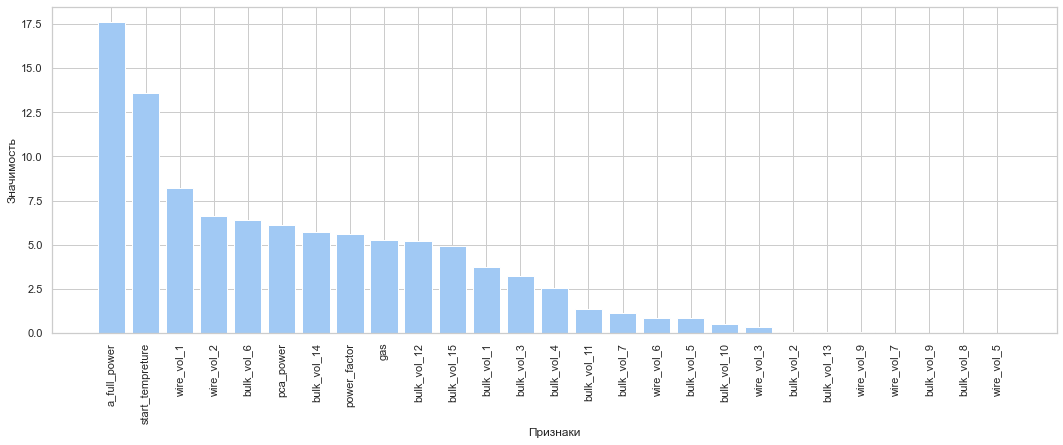

In [108]:
pool = Pool(data=features_train, label=target_train)

regressor = cat_estimator.best_estimator_.named_steps['regressor']
regressor.fit(pool)

feat_importance = regressor.get_feature_importance(pool)
idx = np.argsort(feat_importance)[::-1]

plt.figure(figsize=(18, 6))
plt.bar(range(features_train.shape[1]), feat_importance[idx])
plt.xticks(range(features_train.shape[1]), features_train.columns[idx], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Значимость')
plt.show()

нет ничего важнее работы полной мощности и стартовой температуры нагрева, а что мы там загрузили на некоторых этапах вообще не важно, особенно, если это нулевые значения объемов, столбцы с которыми как раз и расположились в хвосте графика. <br> <br>Также, видно, что выбранный набор сопоставим со списков выбранных фич в kbest на случайном лесе. Определим в разряд лучших фич те, у которых важность выше 2,5

In [109]:
important_features = cat_estimator.best_estimator_.named_steps['regressor'].get_feature_importance(prettified=True)
important_features = important_features[important_features['Importances'] > 2.5]
important_features['Feature Id'].values

array(['a_full_power', 'start_tempreture', 'wire_vol_1', 'wire_vol_2',
       'bulk_vol_6', 'pca_power', 'bulk_vol_14', 'power_factor', 'gas',
       'bulk_vol_12', 'bulk_vol_15', 'bulk_vol_1', 'bulk_vol_3',
       'bulk_vol_4'], dtype=object)

Можно отметить, что результат kbest показал релевантный результат

Сделаем перебор гиперпараметров catboost c выбранными признаками

In [110]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

cat_search = CatBoostRegressor(loss_function = 'MAE', random_state=100423).randomized_search(
    grid,                                                   
    X=StandardScaler().fit_transform(features_train.loc[:, important_features['Feature Id'].values]),                                                   
    y=target_train,                                                   
    shuffle=True,                                                   
    train_size=0.8,
    cv=3,                                                   
    plot=True,                                                   
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1545.4989041	test: 1545.4766286	best: 1545.4766286 (0)	total: 1.59ms	remaining: 1.59s
1:	learn: 1499.1673169	test: 1499.1521536	best: 1499.1521536 (1)	total: 4.1ms	remaining: 2.04s
2:	learn: 1454.2220249	test: 1454.3369012	best: 1454.3369012 (2)	total: 5.63ms	remaining: 1.87s
3:	learn: 1410.6331879	test: 1410.7613330	best: 1410.7613330 (3)	total: 6.64ms	remaining: 1.65s
4:	learn: 1368.3380780	test: 1368.4741033	best: 1368.4741033 (4)	total: 7.52ms	remaining: 1.5s
5:	learn: 1327.3181954	test: 1327.5677450	best: 1327.5677450 (5)	total: 8.34ms	remaining: 1.38s
6:	learn: 1287.5394207	test: 1287.7936546	best: 1287.7936546 (6)	total: 9.22ms	remaining: 1.31s
7:	learn: 1248.9457988	test: 1249.3118126	best: 1249.3118126 (7)	total: 10.3ms	remaining: 1.27s
8:	learn: 1211.5082307	test: 1211.8724402	best: 1211.8724402 (8)	total: 11.4ms	remaining: 1.25s
9:	learn: 1175.1835717	test: 1175.5453030	best: 1175.5453030 (9)	total: 12.5ms	remaining: 1.24s
10:	learn: 1139.9526052	test: 1140.3176758

Сокращение фич неи чего не дало - MAE = 6.97 на тесте. Выбираем в качестве лучшей модели Catboost, обученный на полном наборе фич

### Выбор лучшей модели

| Модель/этап| MAE (train) | 
| --- | --- | 
| Случайный Лес | 6,57 | 
| Lasso | 7,28 | 
| CatBoost | 6,27 |
| --- | --- | 
|  | Таблица 2 |

## Тестирование модели

In [112]:
best_model = cat_estimator.best_estimator_.named_steps['regressor']
predict = best_model.predict(features_test)
mean_absolute_error(target_test, predict)

6.329743279249759

Успех! Сравним с константной моделью:


### Константная модель


In [115]:
baseline_model = DummyRegressor(
    strategy='mean'
)
baseline_model.fit(features_train, target_train)
predict = baseline_model.predict(features_test)
mean_absolute_error(target_test, predict)

8.130447639200806

Очень похоже на то, что показала линейная регрессия. 

### Нейросеть

Посмотрим, как с задачей справится нейронная сеть

In [154]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=64, activation='softmax'))

model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=28, activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=8, activation='relu'))

model.add(keras.layers.Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='Adamax', metrics=['MeanAbsoluteError'])

model.fit(StandardScaler().fit_transform(features_train), target_train, epochs=100, verbose=2,
          validation_data=(StandardScaler().fit_transform(features_test), target_test))

Epoch 1/100
55/55 - 2s - loss: 1593.0966 - mean_absolute_error: 1593.0966 - val_loss: 1593.2019 - val_mean_absolute_error: 1593.2019 - 2s/epoch - 38ms/step
Epoch 2/100
55/55 - 0s - loss: 1592.2738 - mean_absolute_error: 1592.2738 - val_loss: 1591.8063 - val_mean_absolute_error: 1591.8063 - 187ms/epoch - 3ms/step
Epoch 3/100
55/55 - 0s - loss: 1589.8909 - mean_absolute_error: 1589.8909 - val_loss: 1588.0570 - val_mean_absolute_error: 1588.0570 - 191ms/epoch - 3ms/step
Epoch 4/100
55/55 - 0s - loss: 1583.9993 - mean_absolute_error: 1583.9993 - val_loss: 1579.3073 - val_mean_absolute_error: 1579.3073 - 196ms/epoch - 4ms/step
Epoch 5/100
55/55 - 0s - loss: 1571.0262 - mean_absolute_error: 1571.0262 - val_loss: 1560.8765 - val_mean_absolute_error: 1560.8765 - 179ms/epoch - 3ms/step
Epoch 6/100
55/55 - 0s - loss: 1545.1046 - mean_absolute_error: 1545.1046 - val_loss: 1525.5424 - val_mean_absolute_error: 1525.5424 - 202ms/epoch - 4ms/step
Epoch 7/100
55/55 - 0s - loss: 1497.3303 - mean_absolu

| Критерий | Конфигурация слоев | Эпоха |  MAE (train) | MAE (test) |
| --- | --- | --- | --- | --- | 
| ADAM | 64(relu) 32(relu) 28(relu) 16(relu) 8(relu) 1(linear) | 40/100 | 6.5968 | 6.7489 | 
| ADAM | 64(relu) 32(relu) 28(relu) 28(relu) 28(relu) 28(relu) 16(relu) 8(relu) 1(relu)| 44/100 | 6.7310 | 6.6727 | 
| ADAM | 64(relu) 32(relu) 28(relu) 28(relu) 28(relu) 28(relu) 16(relu) 8(relu) 1(relu) | 100/100 | 6.7319 | 6.6552 | 
| ADAM | 64(relu) 32(relu) 28(relu) 28(relu) 28(relu) 28(relu) 16(relu) 8(relu) 1(linear) | 100/100 | 5.8875 | 6.6861 | 
| Adamax | 64(relu) 32(relu) 28(relu) 16(relu) 8(relu) 1(relu) | 100/100 | **5.8521** | 6.6866 |
| Adamax | 64(relu) 32(relu) 28(relu) 16(relu) 8(relu) 1(linear) | 71/100 | 6.0175 | 6.6458 | 


Если судить по тестовой MAE, то лучше всего справился критерий Adamax для 6ти слоев с финальной активацией relu. По оценке тестовой выборке лучшей будет такая же конфигурация но с линейной активацией в последнем нейроне. 

# ОТЧЕТ

### Какие пункты плана были выполнены, а какие — нет. Почему?
Все пункты намеченного плана были выполнены, за исключением этапа «удаление дубликатов». Дубликатов так как попросту не было. 
### Какие трудности возникли и как вы их преодолели?
Основная трудность, а вернее – ошибка, заключалась в первичном варианте подготовки признаков. Так как изначально были учтены в обучении модели непоказательные значения ковшей с единичными измерениями, а также расчет работы (как дополнительного признака) был проведен не корректно (учитывалась разница между первым и последним измерениями мощности вместо суммарной), модель показывала MAE в пределах 7. Внесенные корректировки по итогам выдающихся комментариев ревьюера привели к необходимому результату с удовлетворительной метрикой MAE. 
### Какие ключевые шаги в решении задачи вы выделили?
Ключевое в этой работе было рассчитать нужные наборы признаков, а затем, выбрать среди них значимые, чтобы модель обучилась оптимально. Важным фактором являлось и то, на каких измерениях построено обучение модели – что есть выбросы и что есть значимые измерения. Правильно выбрать подход к выбору признаков и набора измерений – залог успеха. Также на результат повлиял и оказался важным этап исключения коррелирующих признаков. 
### Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?
Полный набор признаков включал в себя данные из изначального набора: о загрузке материалов двух типов, о продувке газом; выделенные и сгенерированные признаки из имеющихся измерений: три варианта мощности, полученных из активной и реактивных ее значений  (рассчитанная методом главных компонент, полная мощность, как сумма квадратов активной и реактивной мощностей, коэффициент мощности, как активная мощность деленная на полную). <br> <br>
На этапе предобработки были исключены явные выбросы, в которых значение температуры оказалось ниже 1400 градусов, и сверхвысокие отрицательные значения мощности. Из набора признаков были исключены данные о единичных измерениях, т.е. там, где для ковша имелось только одно измерение. 
### Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?
Итоговой моделью была выбрана модель CatBoost, обученная с помочью метода Pipeline с составом:
* Скалирования признаков;
* Выбора наиболее значимых признаков методом Kbest с перебором количества значимых признаков от 10 до 27(полного набора признаков) с шагом 2; 
* Перебора гиперпараметров:
1. learning_rate' по списку значений [0.03, 0.1],
2. 'depth' по списку значений [4, 6, 10],
3. 'l2_leaf_reg' по списку значений [1, 3, 5, 7, 9].
Подобранные гиперпараметры модели:
* 'learning_rate' = 0.03,
* 'depth' = 6,
* 'l2_leaf_reg' = 5
* Kbest (k = 24) – 24 параметра из 27ми
Итоговое качество модели:
* MAE на тренировочной выборке – 6,27
* MAE на тестовой выборке – 6,32

### В рамках работы были реализованы следующие шаги и получены нижеописанные результаты: 

1. На этапе **изучения данных** были определены особенности данных, их распределение изучено графически и аналитически. В проекции на поставленную задачу предсказания температуры были определены методы предобработки, выбора целевого признака и генерации новых признаков. Основные выводы этого этапа, которые легли в основу дальнейших пунктов проекта:
* Значения активной и реактивной мощностей сильно коррелируют, что может влиять на качество модели, особенно линейной. Было решено создать несколько вариантов признаков мощности на основе двух этих составляющих, соответственно полная мощность, коэффициент мощности, объединение мощностей методом главных компонент (PCA). Такой подход позволил расширить список признаков и позволил избежать мультиколлинеарности двух признаков. 
* Для прогноза температуры в качестве целевого признака было принято использовать последние значения температуры в каждом ковше. При этом мы теряем потенциально информативные признаки в предшествующих значениях температуры. Было принято решение выделить отдельный признак – начальную температуру нагрева и дополнить его значениями Работы каждого из вариантов мощности, как произведения суммы всех мощностей ковша на длительность промежутка времени, в котором она накапливалась. 
* Данные с временами загрузки материалов нам не пригодятся, как незначащие
* Потенциальные выбросы в данных о загрузке проволоки и сыпучих материалов могут не оказаться выбросами – их принято решение оставить в том же виде, чтобы не испортить след реального технологического процесса
* В роли ключа для связки таблиц решено использовать признак 'key'
* Объем и качество данных позволяют построить модель прогноза
Также, был сформирован список уточняющих вопросов к бизнес-заказчику решения. 
2. Этап **предобработки**
* Пропуски в данных о загрузке материалов заполнили нулевыми значениями. Нет материала – нет значения
* Данные, идентифицированные как выбросы и посторонние значения на предыдущем этапе удалены
* Объединены все необходимые таблицы по ключу ‘key’. При этом оставлены только уникальные ключи каждого значащего ковша с последним значение температуры в партии. 
* Выделен набор признаков и целевой признак в отдельные таблицы, проведено разделение данных на тренировочную и тествовую выборки. 
* В качестве RandomState по проекту определено для установки, для всех требующих ее классах, значение «100423»
* Дубликатов не обнаружено
* Проведена проверка на мультиколлинеарность, которая показала высокое значение корреляции для признаков ['full_power', 'a_pca_power', 'a_power_factor', 'wire_vol_4', 'wire_vol_8'] со значениями дополнительно рассчитанных полной мощности, работы мощности по методу главных компонент, работы коэффициента мощности и данные о загрузки провода типов 4 и 8 соответственно. 
3. В рамках этапа **построения модели машинного обучения** были обучены с учетом перебора гиперпараметорв три различных модели со следующими результатами (Таблица 2) и наблюдениями.
| Модель/этап| MAE (train) | 
| --- | --- | 
| Случайный Лес | 6,57 | 
| Lasso | 7,28 | 
| CatBoost | 6,27 |
|  |  | 
|  | Таблица 1 |
- Для удобства поиска модели была создана функция (modeler), которая на вход получает сетку гиперпараметров для перебора, пайплайн с шагами и условие в трех вариантах:
1. two_factor - перебор парами факторы мощности и работы
2. one_factor - перебор всех факторов мощности и работы последовательно по одному
3. по умолчанию (любые другие значения) - использование полного набора признаков
* **Линейная модель Lasso** показала себя хуже всех. Для данной модели проводился перебор гиперпараметра ‘alpha’ от 1 до 30 с шагом 1, указывающего на силу регуляризации. <br> <br> Также для дополнительного эксперимента были исключены коррелирующие признаки с коэффециентом корреляции выше 0,5 для более жесткой отсечки мултьтиколлинеарности. При этом MAE составил более 8. <br> <br>
* **Модель случайного леса (RandomForest)** показала средний по MAE результат. Были исследованы гиперпараметры со случайным перебором (RandomSearch) значений глубины дерева, количества деревьев, минимального количества выборок, необходимых для разделения внутреннего узла, минимального количества выборок, необходимого для разделения внутреннего узла и количества функций, которые следует учитывать при поиске лучшего разделения. <br> <br> За выбор признаков в методе Pipeline отвечает функция kBest с перебором вариантов количества лучших признаков от 10 до полной выборки. Также, с помощью встроенной в функцию modeler, модулей перебора признаков, были рассмотрены варианты всех возможных комбинаций пар сгенерированных признаков мощностей и их работ, а также произведен их последовательный перебор.  В результате лучше всех отработал алгоритм kbest, выбравший комбинацию из 20ти лучших признаков, на который MAE составила 6,57. Выбранные гиперпараметры:  'regressor__n_estimators': 100, 'regressor__min_samples_split': 12, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'auto', 'regressor__max_depth': 13, 'k_best__k': 20. <br> <br>
* Лучший MAE=6,27 был получен на модели **CatBoost** на гиперпараметрах, 'regressor__learning_rate': 0.03, 'regressor__l2_leaf_reg': 5, 'regressor__depth': 6, 'k_best__k': 24, полученных при переборе RandomSearch для вариантов перебора скорости обучения learning_rate по списку [0.03, 0.1], глубины залегания дерева depth по списку [4, 6, 10], коэффициента на L2 регуляризации функции затрат l2_leaf_reg по списку [1, 3, 5, 7, 9].  <br> <br>
В рамках данного пункта были определены признаки, с наибольшим вкладом в прогноз – это (в порядке снижения значимости): 'a_full_power', 'start_tempreture', 'wire_vol_1', 'wire_vol_2',
       'bulk_vol_6', 'pca_power', 'bulk_vol_14', 'power_factor', 'gas',
       'bulk_vol_12', 'bulk_vol_15', 'bulk_vol_1', 'bulk_vol_3',
       'bulk_vol_4'
* При тестировании лучшей модели CatBoost были получены результаты MAE=6,33, удовлетворяющие требованиям к модели (MAE>6.8)
* Проверка константной модели показала более низкую метрику MAE=8,13 чем выбранная модель при тестировании
* Дополнительно (вне рамок отбора лучшей модели) была построена нейронная сеть на базе методоб библиотеки keras с экспериментальными конфигурациями и результатами тестирования (Таблица 2), которые превзошли результаты выбранной модели машинного обучения.
| Критерий | Конфигурация слоев | Эпоха |  MAE (train) | MAE (test) |
| --- | --- | --- | --- | --- | 
| ADAM | 64(relu) 32(relu) 28(relu) 16(relu) 8(relu) 1(linear) | 40/100 | 6.5968 | 6.7489 | 
| ADAM | 64(relu) 32(relu) 28(relu) 28(relu) 28(relu) 28(relu) 16(relu) 8(relu) 1(relu)| 44/100 | 6.7310 | 6.6727 | 
| ADAM | 64(relu) 32(relu) 28(relu) 28(relu) 28(relu) 28(relu) 16(relu) 8(relu) 1(relu) | 100/100 | 6.7319 | 6.6552 | 
| ADAM | 64(relu) 32(relu) 28(relu) 28(relu) 28(relu) 28(relu) 16(relu) 8(relu) 1(linear) | 100/100 | 5.8875 | 6.6861 | 
| Adamax | 64(relu) 32(relu) 28(relu) 16(relu) 8(relu) 1(relu) | 100/100 | **5.8521** | 6.6866 |
| Adamax | 64(relu) 32(relu) 28(relu) 16(relu) 8(relu) 1(linear) | 71/100 | 6.0175 | 6.6458 |
|  |  |  | |  | 
|  |  |  |  Таблица 2 |

###  Общий вывод
Проведенная работа дает основание утверждать, что прогноз значения температуры на финальных стадиях нагрева, может быть предсказан по имеющемуся набору признаков в имеющемся объеме данных. Такой прогноз вполне можно использовать для предупреждения перегрева сплава сверх необходимых температур, что приведет к сокращению энергопотребления. 
